In [1]:
import csv

import networkx as nx
import numpy as np

import feather as ft
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
from operator import itemgetter
from os import listdir
from os.path import isfile, isdir, join, exists
from sklearn.preprocessing import MinMaxScaler

We need the average time for each node to become a stifler. then compute $k_{norm}$

In [31]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['font.size'] = 18

In [2]:
EmailURV = '../../src/datasets/EmailURV/EmailURV.csv'
Emailcontacts = '../../src/datasets/Emailcontacts/Emailcontacts.csv'

G = nx.Graph()
with open(EmailURV, 'r') as file:
    reader = csv.reader(file, delimiter=",")
    for row in reader:
        G.add_edge(int(row[0]), int(row[1]))
N_AGENTS = len(G.nodes())

minmax = {}
for i in range(max(nx.core_number(G).values()) + 1):
    subG = nx.k_core(G,i)
    maxG = max(dict(subG.degree).values())
    minG = min(dict(subG.degree).values())
    minmax[i] = {}
    minmax[i]['max'] = maxG
    minmax[i]['min'] = minG
minmax

{0: {'max': 71, 'min': 1},
 1: {'max': 71, 'min': 1},
 2: {'max': 70, 'min': 2},
 3: {'max': 68, 'min': 3},
 4: {'max': 68, 'min': 4},
 5: {'max': 66, 'min': 5},
 6: {'max': 66, 'min': 6},
 7: {'max': 61, 'min': 7},
 8: {'max': 59, 'min': 8},
 9: {'max': 52, 'min': 9},
 10: {'max': 36, 'min': 10},
 11: {'max': 11, 'min': 11}}

In [3]:
mypath = '../../log/'
maindirs = [join(mypath, f) for f in listdir(mypath) if isdir(join(mypath,f)) and "SIRhisto" in f]
maindirs=maindirs[0]
#dirs = [join(mypath, f) for f in listdir(mypath) if isdir(join(mypath,f)) and ("Graph" in f or "URV" in f)]
dirs = [join(maindirs, f) for f in listdir(maindirs) if isdir(join(maindirs,f))]
dirs

['../../log/TestingSIRhisto/2019_08_02_16_17_11',
 '../../log/TestingSIRhisto/2019_08_02_16_21_34',
 '../../log/TestingSIRhisto/2019_08_02_16_18_39',
 '../../log/TestingSIRhisto/2019_08_02_16_16_54',
 '../../log/TestingSIRhisto/2019_08_02_16_10_19',
 '../../log/TestingSIRhisto/2019_08_02_16_20_24',
 '../../log/TestingSIRhisto/2019_08_02_16_19_49',
 '../../log/TestingSIRhisto/2019_08_02_16_17_46',
 '../../log/TestingSIRhisto/2019_08_02_16_20_42',
 '../../log/TestingSIRhisto/2019_08_02_16_09_36',
 '../../log/TestingSIRhisto/2019_08_02_16_16_37',
 '../../log/TestingSIRhisto/2019_08_02_16_09_58',
 '../../log/TestingSIRhisto/2019_08_02_16_20_07',
 '../../log/TestingSIRhisto/2019_08_02_16_18_57',
 '../../log/TestingSIRhisto/2019_08_02_16_17_29',
 '../../log/TestingSIRhisto/2019_08_02_16_09_16',
 '../../log/TestingSIRhisto/2019_08_02_16_20_59',
 '../../log/TestingSIRhisto/2019_08_02_16_21_16',
 '../../log/TestingSIRhisto/2019_08_02_16_19_15',
 '../../log/TestingSIRhisto/2019_08_02_16_19_32',


In [311]:
dd = dirs[0]
df = pd.DataFrame()
tdf = pd.DataFrame()

with open(join(dd, 'k_core.csv'), 'r') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        if len(row) < 5:
            continue
        #try:
        #    int(row[0])
        #except:
        #    continue
        pass
        #print(row)

dataframelist = []
#for dd in dirs:
#    tdf = pd.DataFrame()
#    tdf = pd.read_csv(join(dd,'k_core.csv'), skiprows=12)
#    tdf['data'] = pd.Series([dd] * len(tdf), index=tdf.index)
#    # filter remove k-core 0 and 11
#    tdf = tdf.loc[tdf['k-core'] != 0]
#    tdf = tdf.loc[tdf['k-core'] != 11]
#    dataframelist.append(tdf)
#df = pd.concat(dataframelist)
#df

df = pd.DataFrame()
df = pd.read_csv(join(dd,'k_core.csv'), skiprows=12)
df['data'] = pd.Series([dd] * len(df), index=df.index)
# filter remove k-core 0 and 11
df = df.loc[df['k-core'] != 0]
df = df.loc[df['k-core'] != 11]
df

,time,agent,k-core,state,degree,data
1,1,1,10,s,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
2,1,2,10,s,23,../../log/TestingSIRhisto/2019_08_02_16_17_11
3,1,3,10,s,38,../../log/TestingSIRhisto/2019_08_02_16_17_11
4,1,4,9,s,22,../../log/TestingSIRhisto/2019_08_02_16_17_11
5,1,5,8,s,10,../../log/TestingSIRhisto/2019_08_02_16_17_11
6,1,6,10,s,21,../../log/TestingSIRhisto/2019_08_02_16_17_11
7,1,7,10,s,26,../../log/TestingSIRhisto/2019_08_02_16_17_11
8,1,8,7,s,8,../../log/TestingSIRhisto/2019_08_02_16_17_11
9,1,9,10,s,17,../../log/TestingSIRhisto/2019_08_02_16_17_11
10,1,10,9,s,32,../../log/TestingSIRhisto/2019_08_02_16_17_11


In [305]:
df.sort_values('agent')

,time,agent,k-core,state,degree,data
1,1,1,10,s,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
47629,43,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
19279,18,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
20413,19,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
60103,54,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
61237,55,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
5671,6,1,10,i,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
74845,67,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
62371,56,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
18145,17,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11


In [306]:
df.loc[df['state']=='r'].sort_values('agent')       

,time,agent,k-core,state,degree,data
44227,40,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
38557,35,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
39691,36,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
77113,69,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
40825,37,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
41959,38,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
43093,39,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
75979,68,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
45361,41,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11
46495,42,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11


In [312]:
mintime = df.loc[
    df['state']=='r'
].loc[
    df['data'] == dd
].sort_values('agent').groupby(['agent'])[['time']].min()
mintime
df['mintime'] = mintime
df.sort_values('agent')

,time,agent,k-core,state,degree,data,mintime
1,1,1,10,s,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,13.0
47629,43,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,NaN
19279,18,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,NaN
20413,19,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,NaN
60103,54,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,NaN
61237,55,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,NaN
5671,6,1,10,i,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,NaN
74845,67,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,NaN
62371,56,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,NaN
18145,17,1,10,r,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,NaN


$k_{norm} = \frac{k_i - k^s_{min}}{k^s_{max} - k^s_{min}}$

In [313]:
k_norm = df.apply(lambda row: 
                  ( row['degree'] - 
                   minmax[row['k-core']]['min'] ) /
                  ( minmax[row['k-core']]['max'] - 
                   minmax[row['k-core']]['min']), axis=1)

Add column $k_{norm}$ 

In [314]:
df['k-norm'] = k_norm
#df['time'] = df['time'].apply(lambda x: x / 100)
#df['k-norm'] = df['k-norm'].apply(lambda x: np.log10(x))

In [315]:
df = df.dropna(how='any')
try:
    df = df.drop(columns=['time', 'agent', 'state'])
except:
    print('drop failed')
df

,k-core,degree,data,mintime,k-norm
1,10,30,../../log/TestingSIRhisto/2019_08_02_16_17_11,13.0,0.769231
2,10,23,../../log/TestingSIRhisto/2019_08_02_16_17_11,6.0,0.500000
3,10,38,../../log/TestingSIRhisto/2019_08_02_16_17_11,19.0,1.076923
4,9,22,../../log/TestingSIRhisto/2019_08_02_16_17_11,33.0,0.302326
5,8,10,../../log/TestingSIRhisto/2019_08_02_16_17_11,24.0,0.039216
6,10,21,../../log/TestingSIRhisto/2019_08_02_16_17_11,17.0,0.423077
7,10,26,../../log/TestingSIRhisto/2019_08_02_16_17_11,9.0,0.615385
8,7,8,../../log/TestingSIRhisto/2019_08_02_16_17_11,11.0,0.018519
9,10,17,../../log/TestingSIRhisto/2019_08_02_16_17_11,11.0,0.269231
10,9,32,../../log/TestingSIRhisto/2019_08_02_16_17_11,9.0,0.534884


In [316]:
#df = df.loc[df['state'] == 'r']
#df = df.loc[df['k-core'] == 2]
#df = df.loc[df['degree'] == 2]


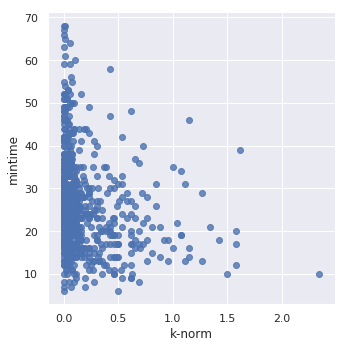

In [317]:
sns.lmplot(x="k-norm", y="mintime", data=df, fit_reg=False)

In [4]:
dataframelist = []
for dd in dirs:
    # create an empty df
    df = pd.DataFrame()
    
    # fill csv
    df = pd.read_csv(join(dd,'k_core.csv'), skiprows=12)
    
    # write name of simulation
    df['data'] = pd.Series([dd] * len(df), index=df.index)
    
    # filter remove k-core 0 and 11
    df = df.loc[df['k-core'] != 0]
    df = df.loc[df['k-core'] != 11]

    # find the minimum time for stiflers and for simulation
    mintime = df.loc[
        df['state']=='r'
    ].loc[
        df['data'] == dd
    ].sort_values('agent').groupby(['agent'])[['time']].min()

    # append the column
    df['mintime'] = mintime
    
    # evaluate knorm
    k_norm = df.apply(lambda row: 
                  ( row['degree'] - 
                   minmax[row['k-core']]['min'] ) /
                  ( minmax[row['k-core']]['max'] - 
                   minmax[row['k-core']]['min']), axis=1)
    
    # append column
    df['k-norm'] = k_norm

    # drop all NaN rows
    df = df.dropna(how='any')

    # drop time, agent, state columns
    try:
        df = df.drop(columns=['time', 'state'])
    except:
        print('drop failed')
    
    # create one big dataframe
    dataframelist.append(df)
dff = pd.concat(dataframelist)

In [5]:
mean_min_time = dff.groupby(['agent'])[['mintime']].apply(np.mean)
dff = dff.set_index(['agent'])
dff['meanmintime'] = mean_min_time
dff = dff.drop_duplicates()
dff = dff.reset_index()

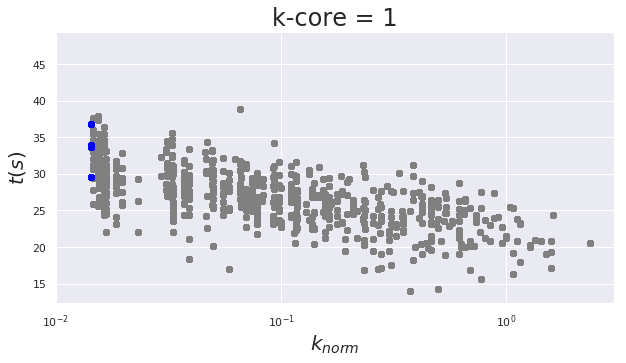

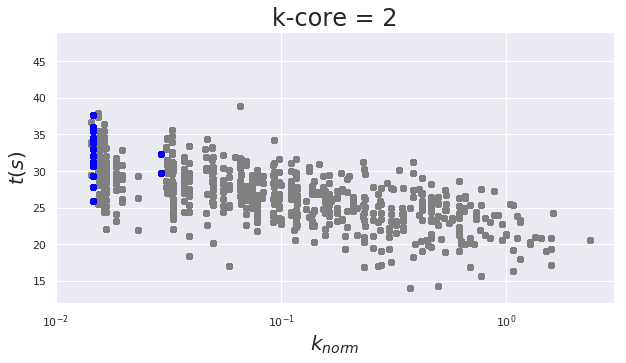

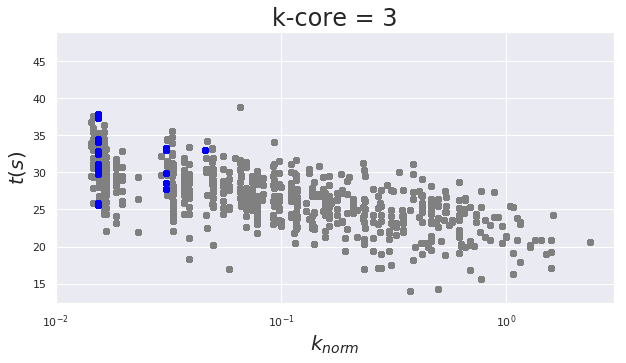

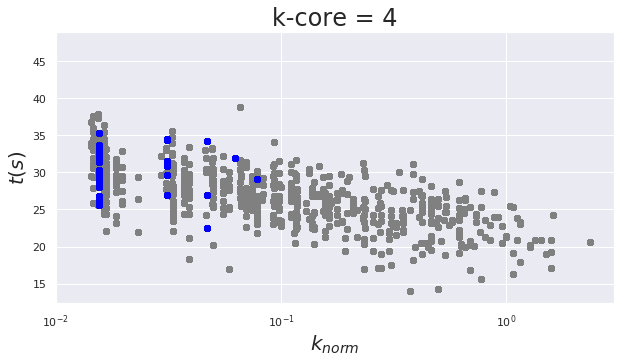

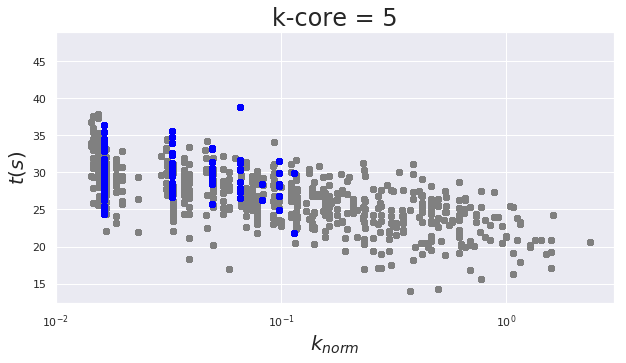

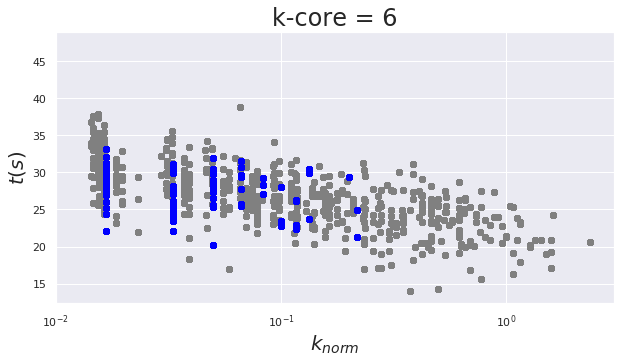

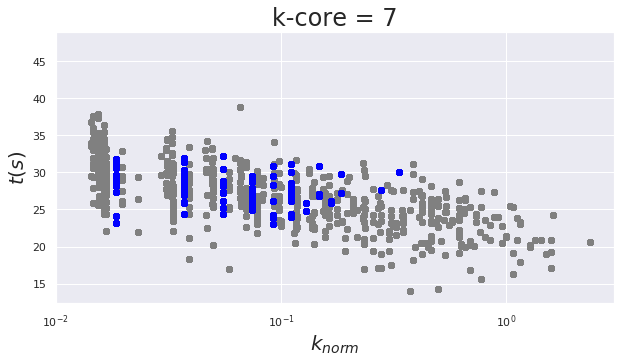

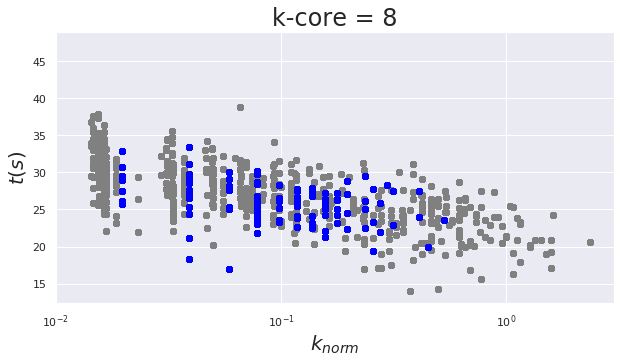

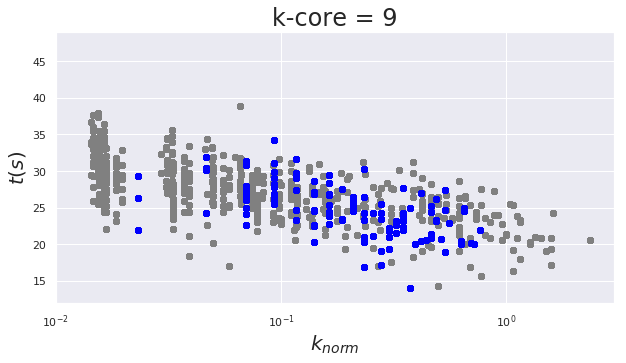

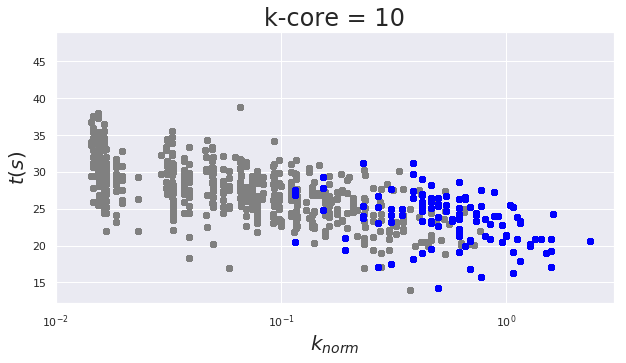

In [32]:
for index in range(11):
    if index == 0:
        continue
    fig, ax = plt.subplots()
    ax.set_xlim(0.01,3)
    ax.set(xscale="log",)
    sns.regplot(x="k-norm", y="meanmintime",data=dff, fit_reg=False, ax=ax, color='grey')
    sns.regplot(x="k-norm", y="meanmintime", data=dff.loc[dff['k-core'] == index], fit_reg=False, color='blue',ax=ax)
    #ax.set_xscale('log')
    plt.title("k-core = "+str(index),fontsize=24)
    plt.xlabel("$k_{norm}$",fontsize=20)
    plt.ylabel("$t(s)$",fontsize=20)
    plt.savefig("averagetimeonknorm"+str(index)+".pdf")
    plt.show()

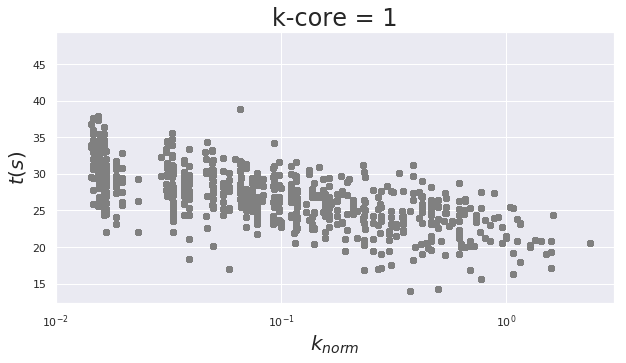

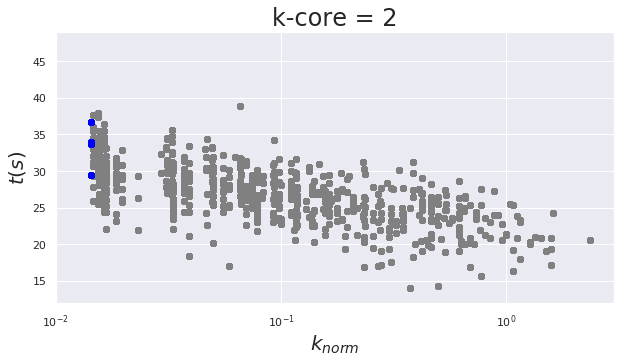

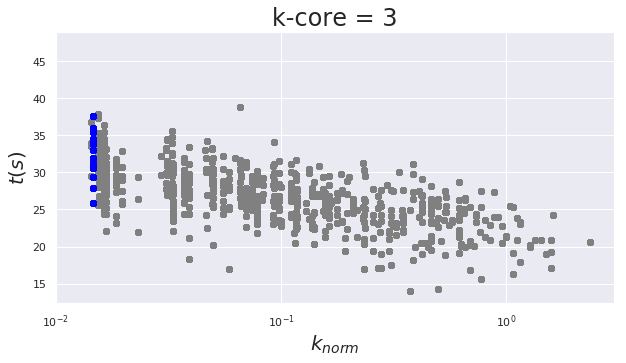

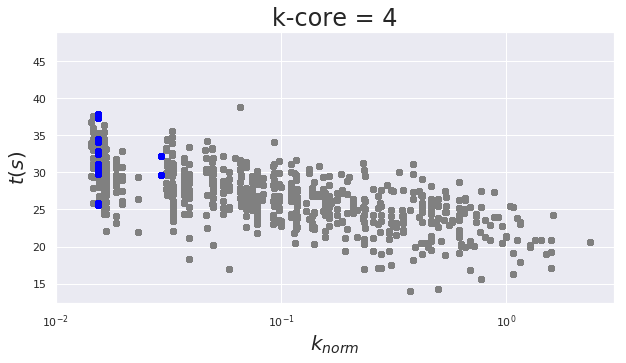

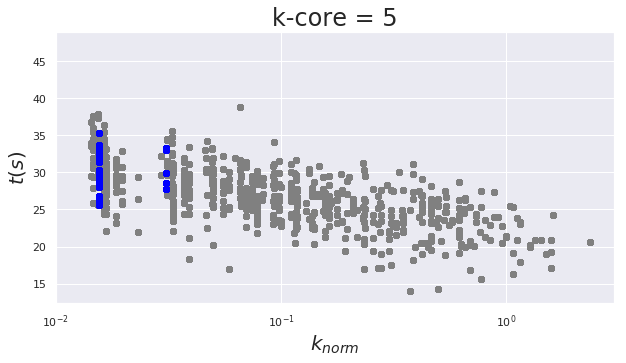

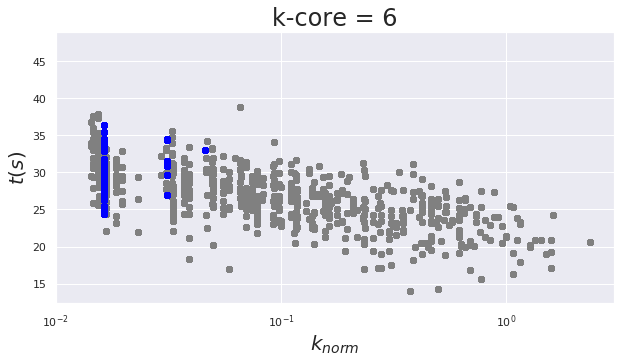

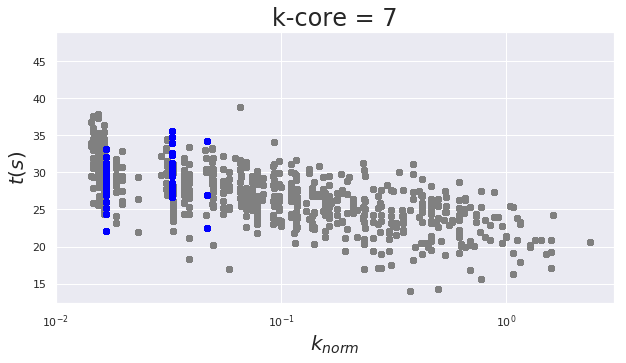

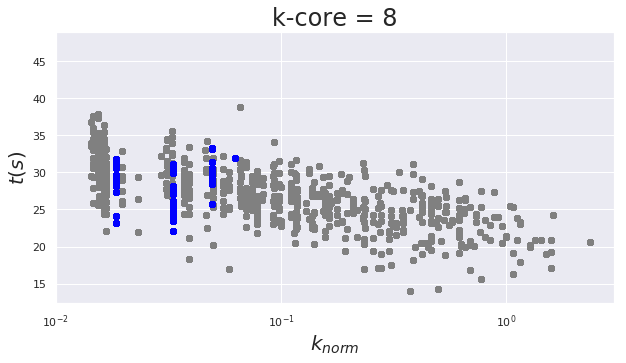

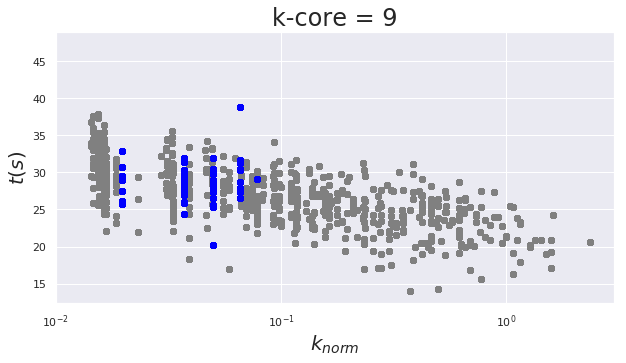

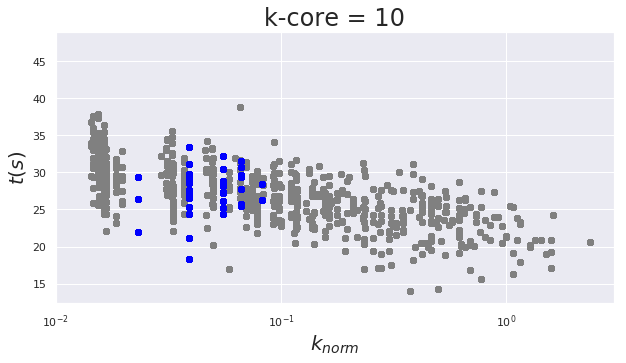

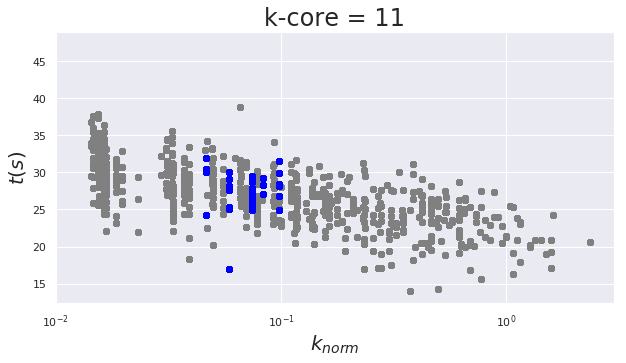

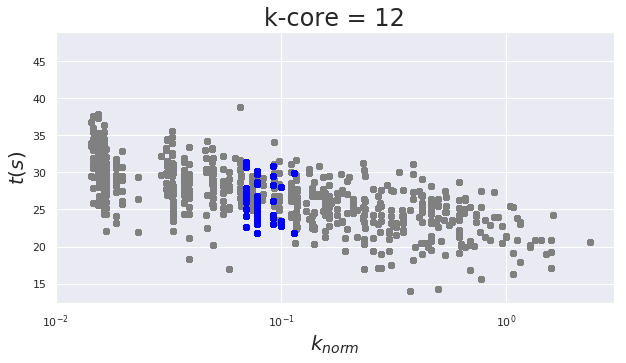

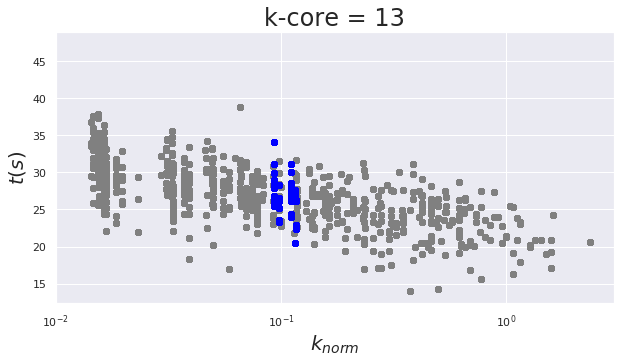

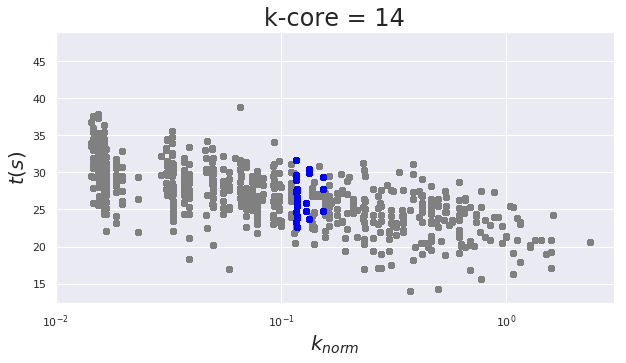

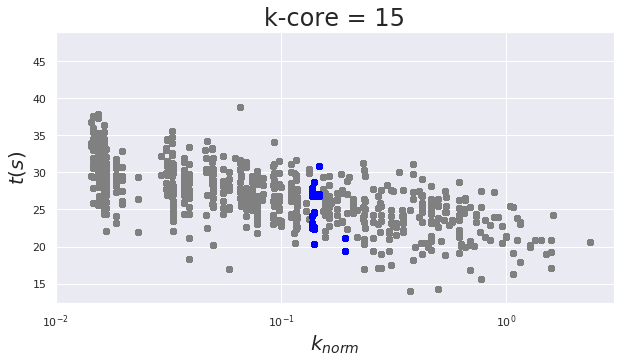

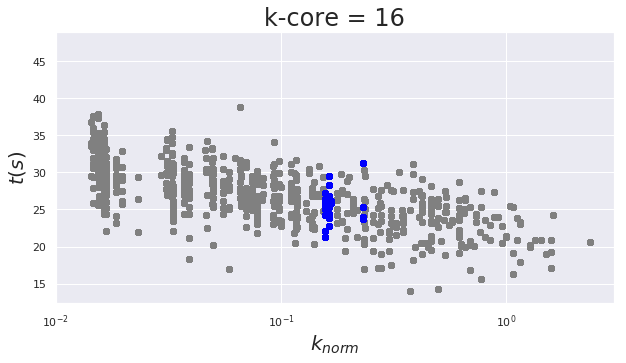

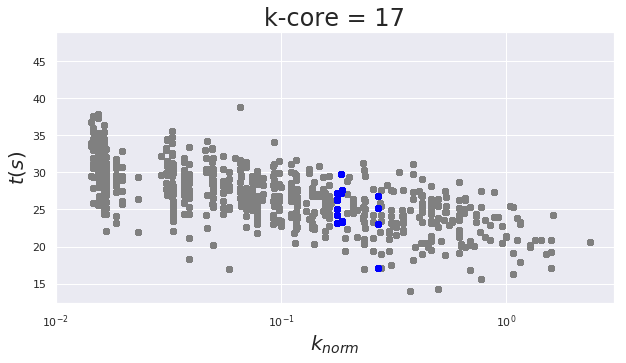

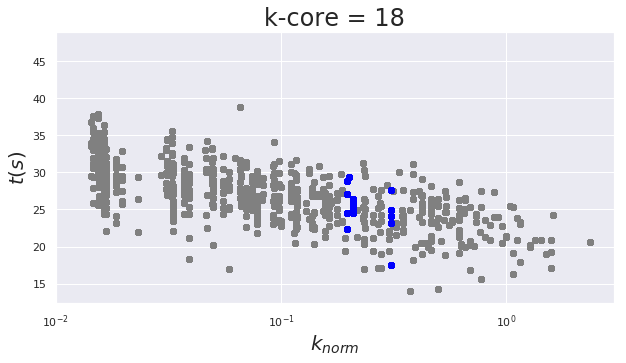

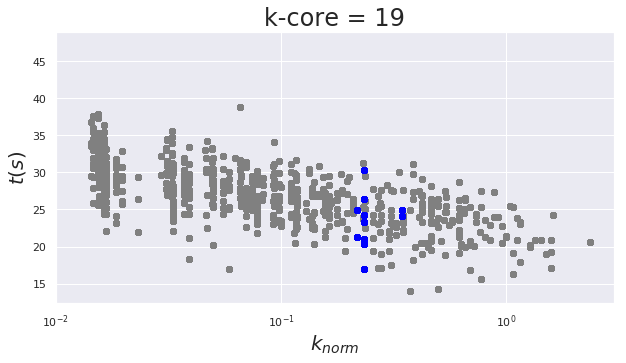

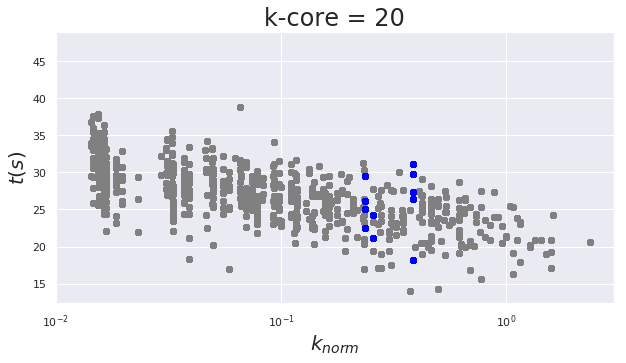

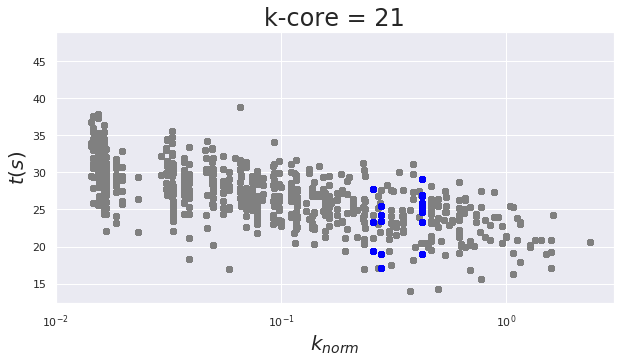

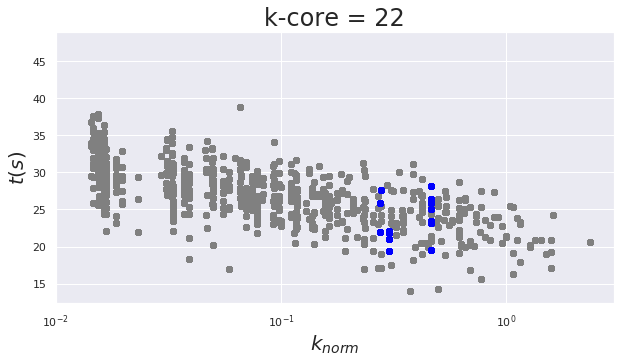

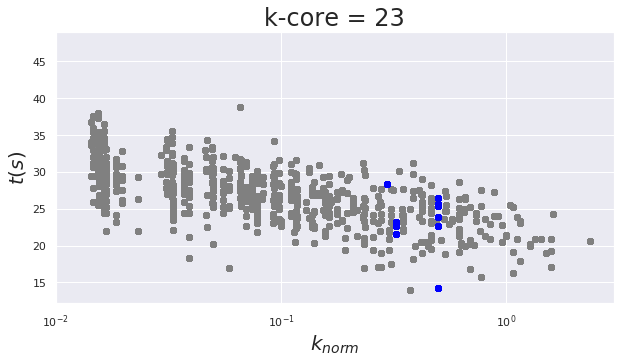

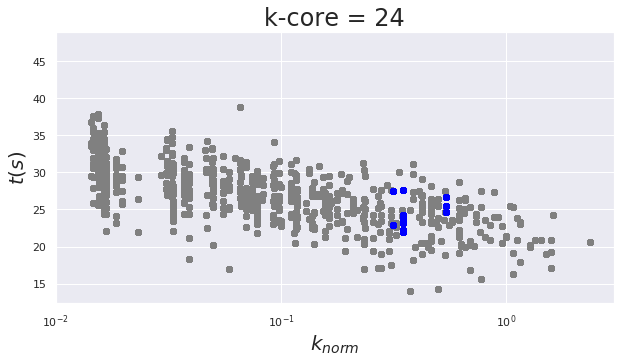

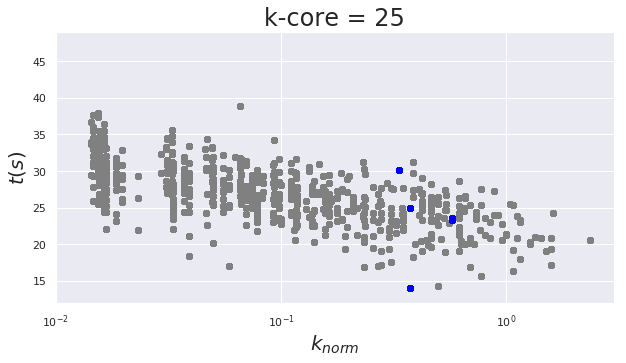

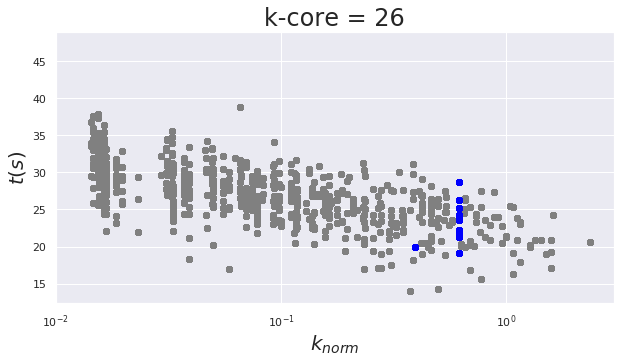

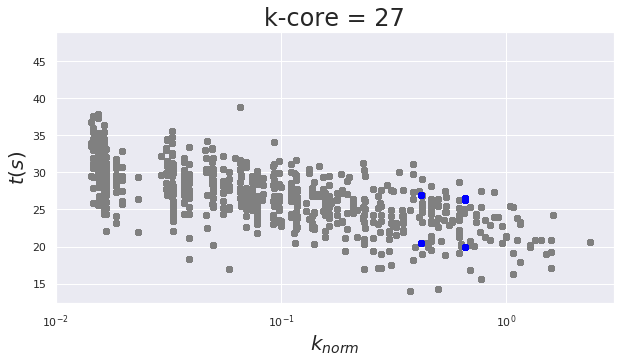

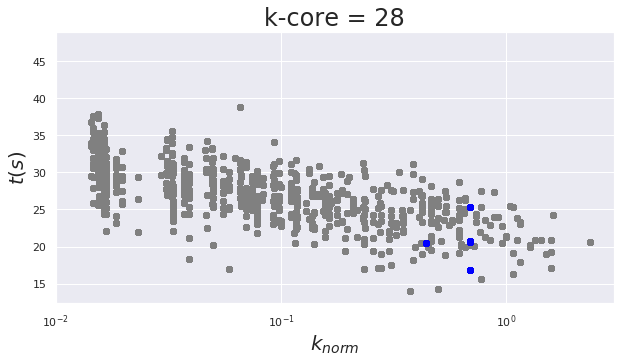

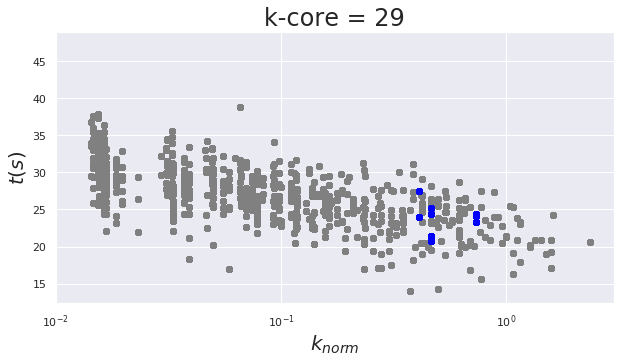

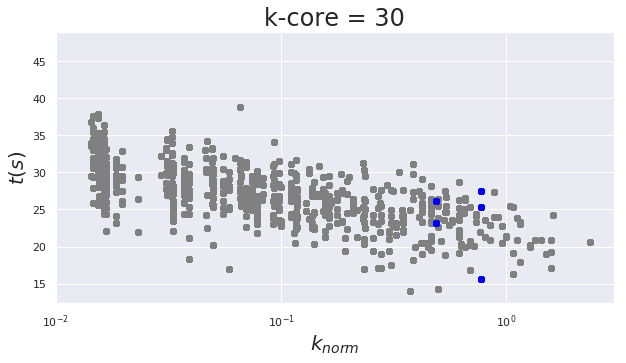

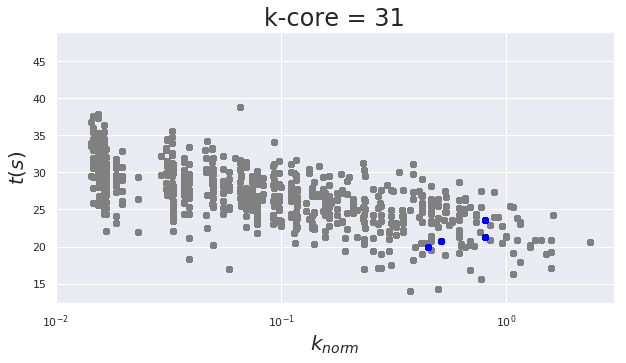

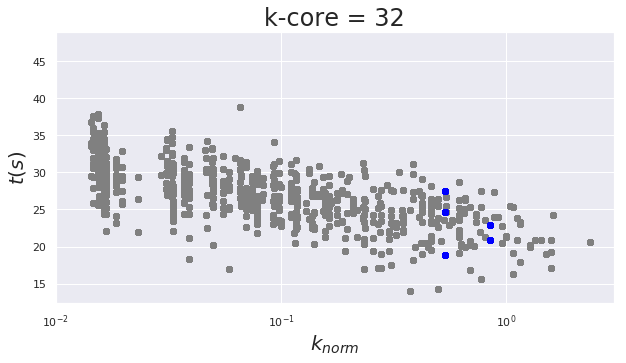

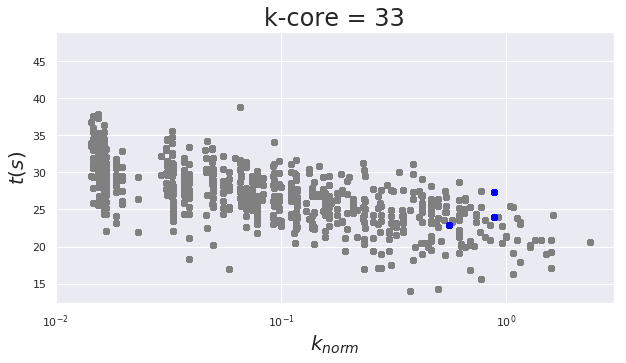

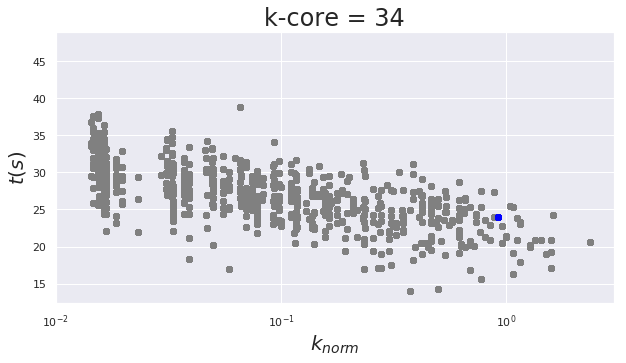

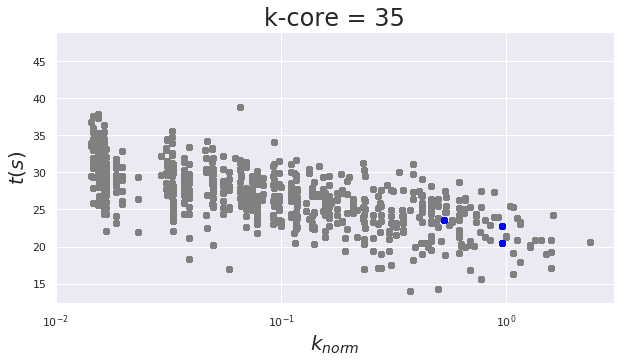

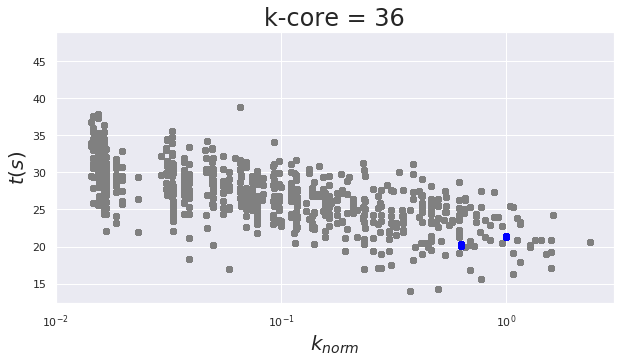

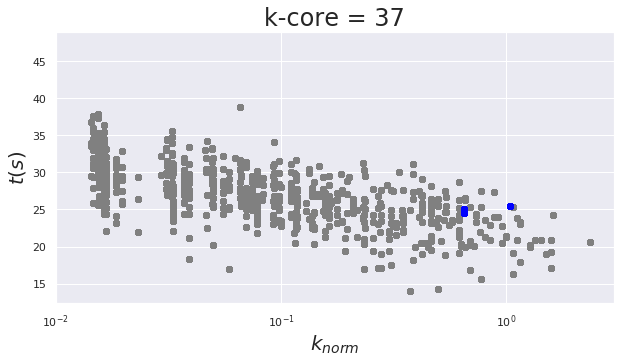

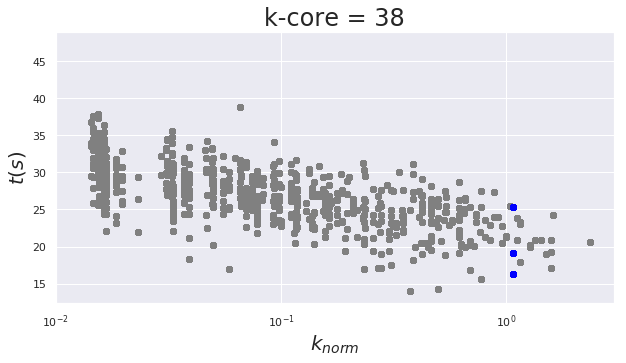

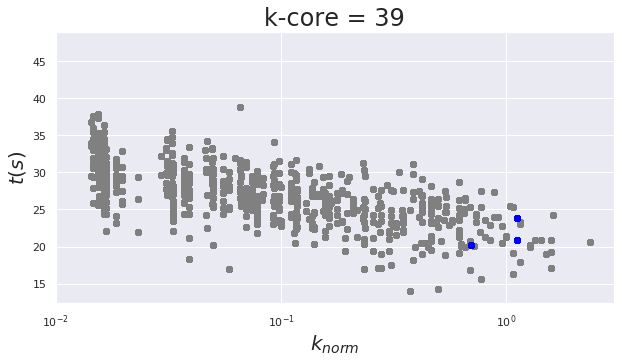

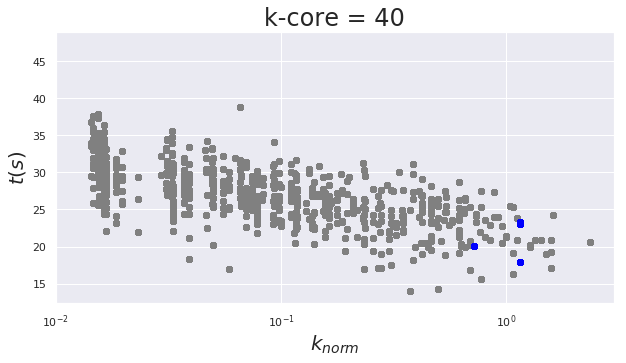

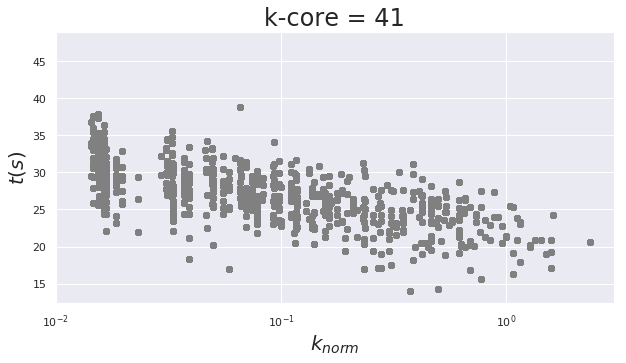

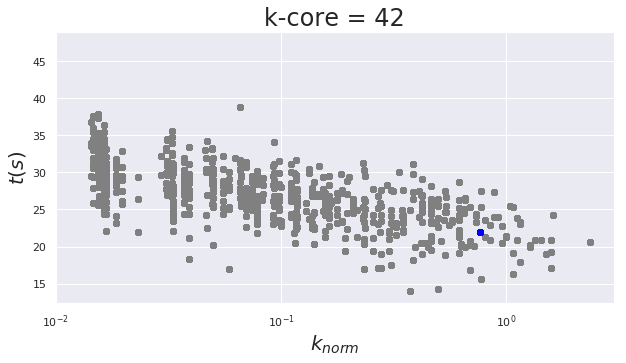

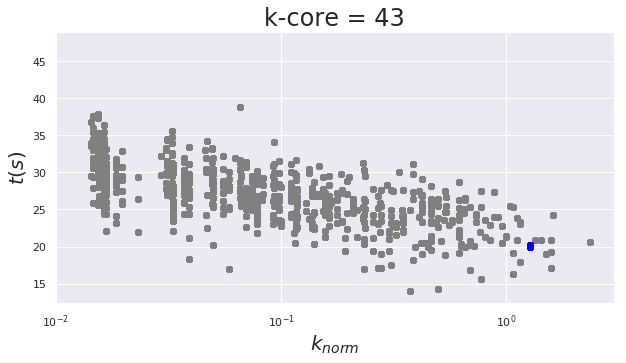

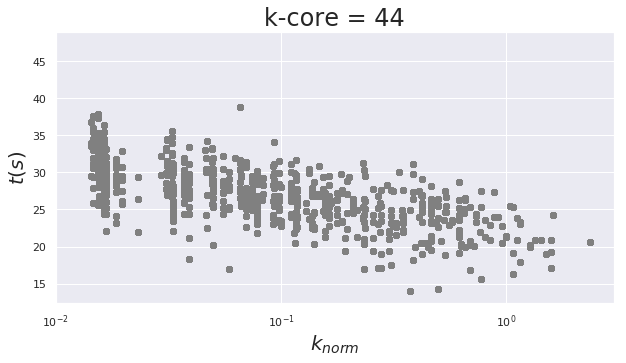

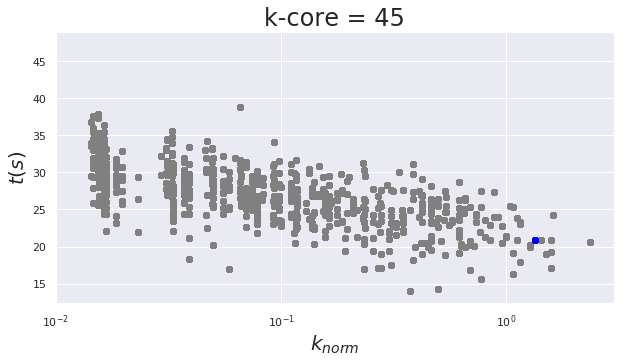

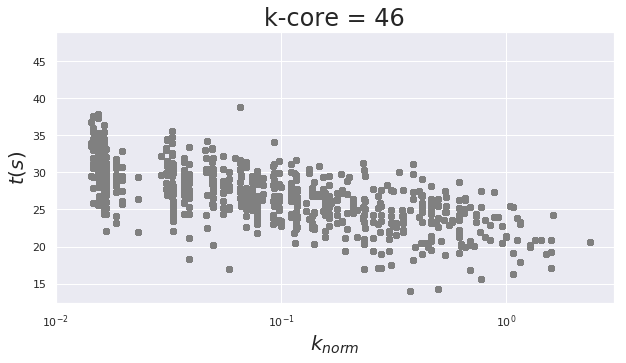

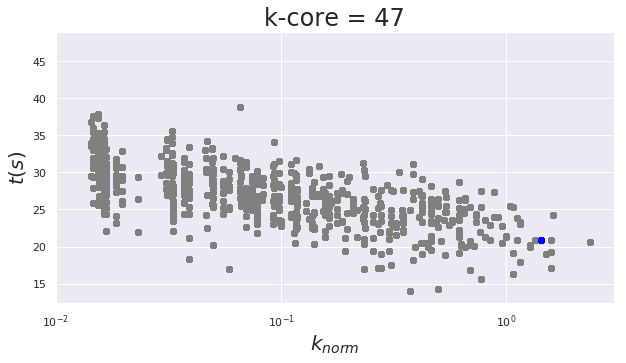

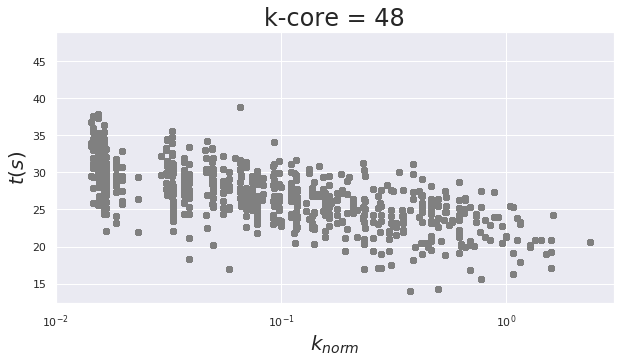

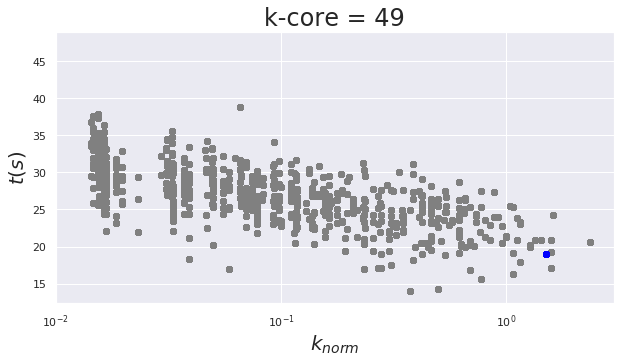

In [34]:
for index in range(50):
    if index == 0:
        continue
    fig, ax = plt.subplots()
    ax.set_xlim(0.01,3)
    ax.set(xscale="log",)
    sns.regplot(x="k-norm", y="meanmintime",data=dff, fit_reg=False, ax=ax, color='grey')
    sns.regplot(x="k-norm", y="meanmintime", data=dff.loc[dff['degree'] == index], fit_reg=False, color='blue',ax=ax)
    #ax.set_xscale('log')
    plt.title("k-core = "+str(index),fontsize=24)
    plt.xlabel("$k_{norm}$",fontsize=20)
    plt.ylabel("$t(s)$",fontsize=20)
    plt.show()

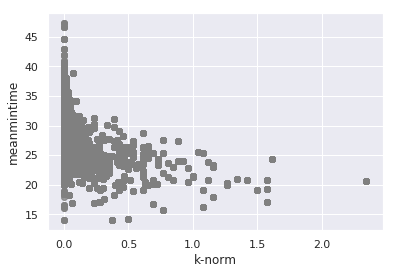

In [22]:
fig, ax = plt.subplots()
#ax.set_xscale("log")
sns.regplot(x="k-norm", y="meanmintime",data=dff, ax=ax, fit_reg=False, color='grey')


In [59]:
k_norm

,k-core,degree
0,0,0
1,10,30
2,10,23
3,10,38
4,9,22
5,8,10
6,10,21
7,10,26
8,7,8
9,10,17
